In [1]:
import cudf as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/all_data_groupped.csv', index_col=0)

In [3]:
data.head()

,user_phone,campaign_cost,campaign_type_click,campaign_type_conversion,campaign_type_show,source_medium_android / mobile_app,source_medium_bing / organic,source_medium_email / email,source_medium_finance.rambler.ru / cpm,source_medium_google / organic,...,event_type_conversion,event_type_show,product_type_deposits,product_type_loan,product_type_mortgage,event_status_approve,event_status_deal,event_status_payout,event_status_reject,event_status_sale
0,79115743201,0.0,0,0,1,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
1,79115746314,0.0,0,0,1,0,0,0,0,0,...,0,1,0,2,0,0,0,0,0,0
2,79122056776,0.0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,79123255057,0.0,0,0,1,0,0,0,0,0,...,0,1,0,2,0,0,0,0,0,0
4,79110846323,0.0,0,0,2,1,0,0,0,1,...,0,1,0,2,0,0,0,0,0,0


In [4]:
def check_if_conversion(df:pd.DataFrame):
    if df['conversion_total'] > 0:
        return 1
    else:
        return 0

In [5]:
data['conversion_total'] = data[['campaign_type_conversion','event_type_conversion']].sum(axis=1)

In [6]:
data.fillna(0.0, inplace=True)

In [7]:
data['touches_total'] = data[['campaign_type_click', 'campaign_type_show', 'event_type_click', 'event_type_show']].sum(axis=1)

In [9]:
data['true_if_conversion'] = data.apply(check_if_conversion, axis=1)

In [17]:
data_with_conversions = data.loc[data['true_if_conversion'] == 1]['touches_total']

In [23]:
data_with_conversions.describe()

count    382745.000000
mean          3.355192
std           1.699673
min           1.000000
25%           3.000000
50%           3.000000
75%           4.000000
max         971.000000
Name: touches_total, dtype: float64

In [20]:
data_without_conversions = data.loc[data['true_if_conversion'] == 0]['touches_total']

In [27]:
data_without_conversions.describe()

count    6.997953e+06
mean     2.554206e+00
std      6.967770e-01
min      2.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      1.000000e+01
Name: touches_total, dtype: float64

In [22]:
data_without_conversions.median()

2.0

In [12]:
corr_matrix = data.corr().to_numpy()

In [15]:
corr_matrix_val = data.corr().columns.values

<Axes: >

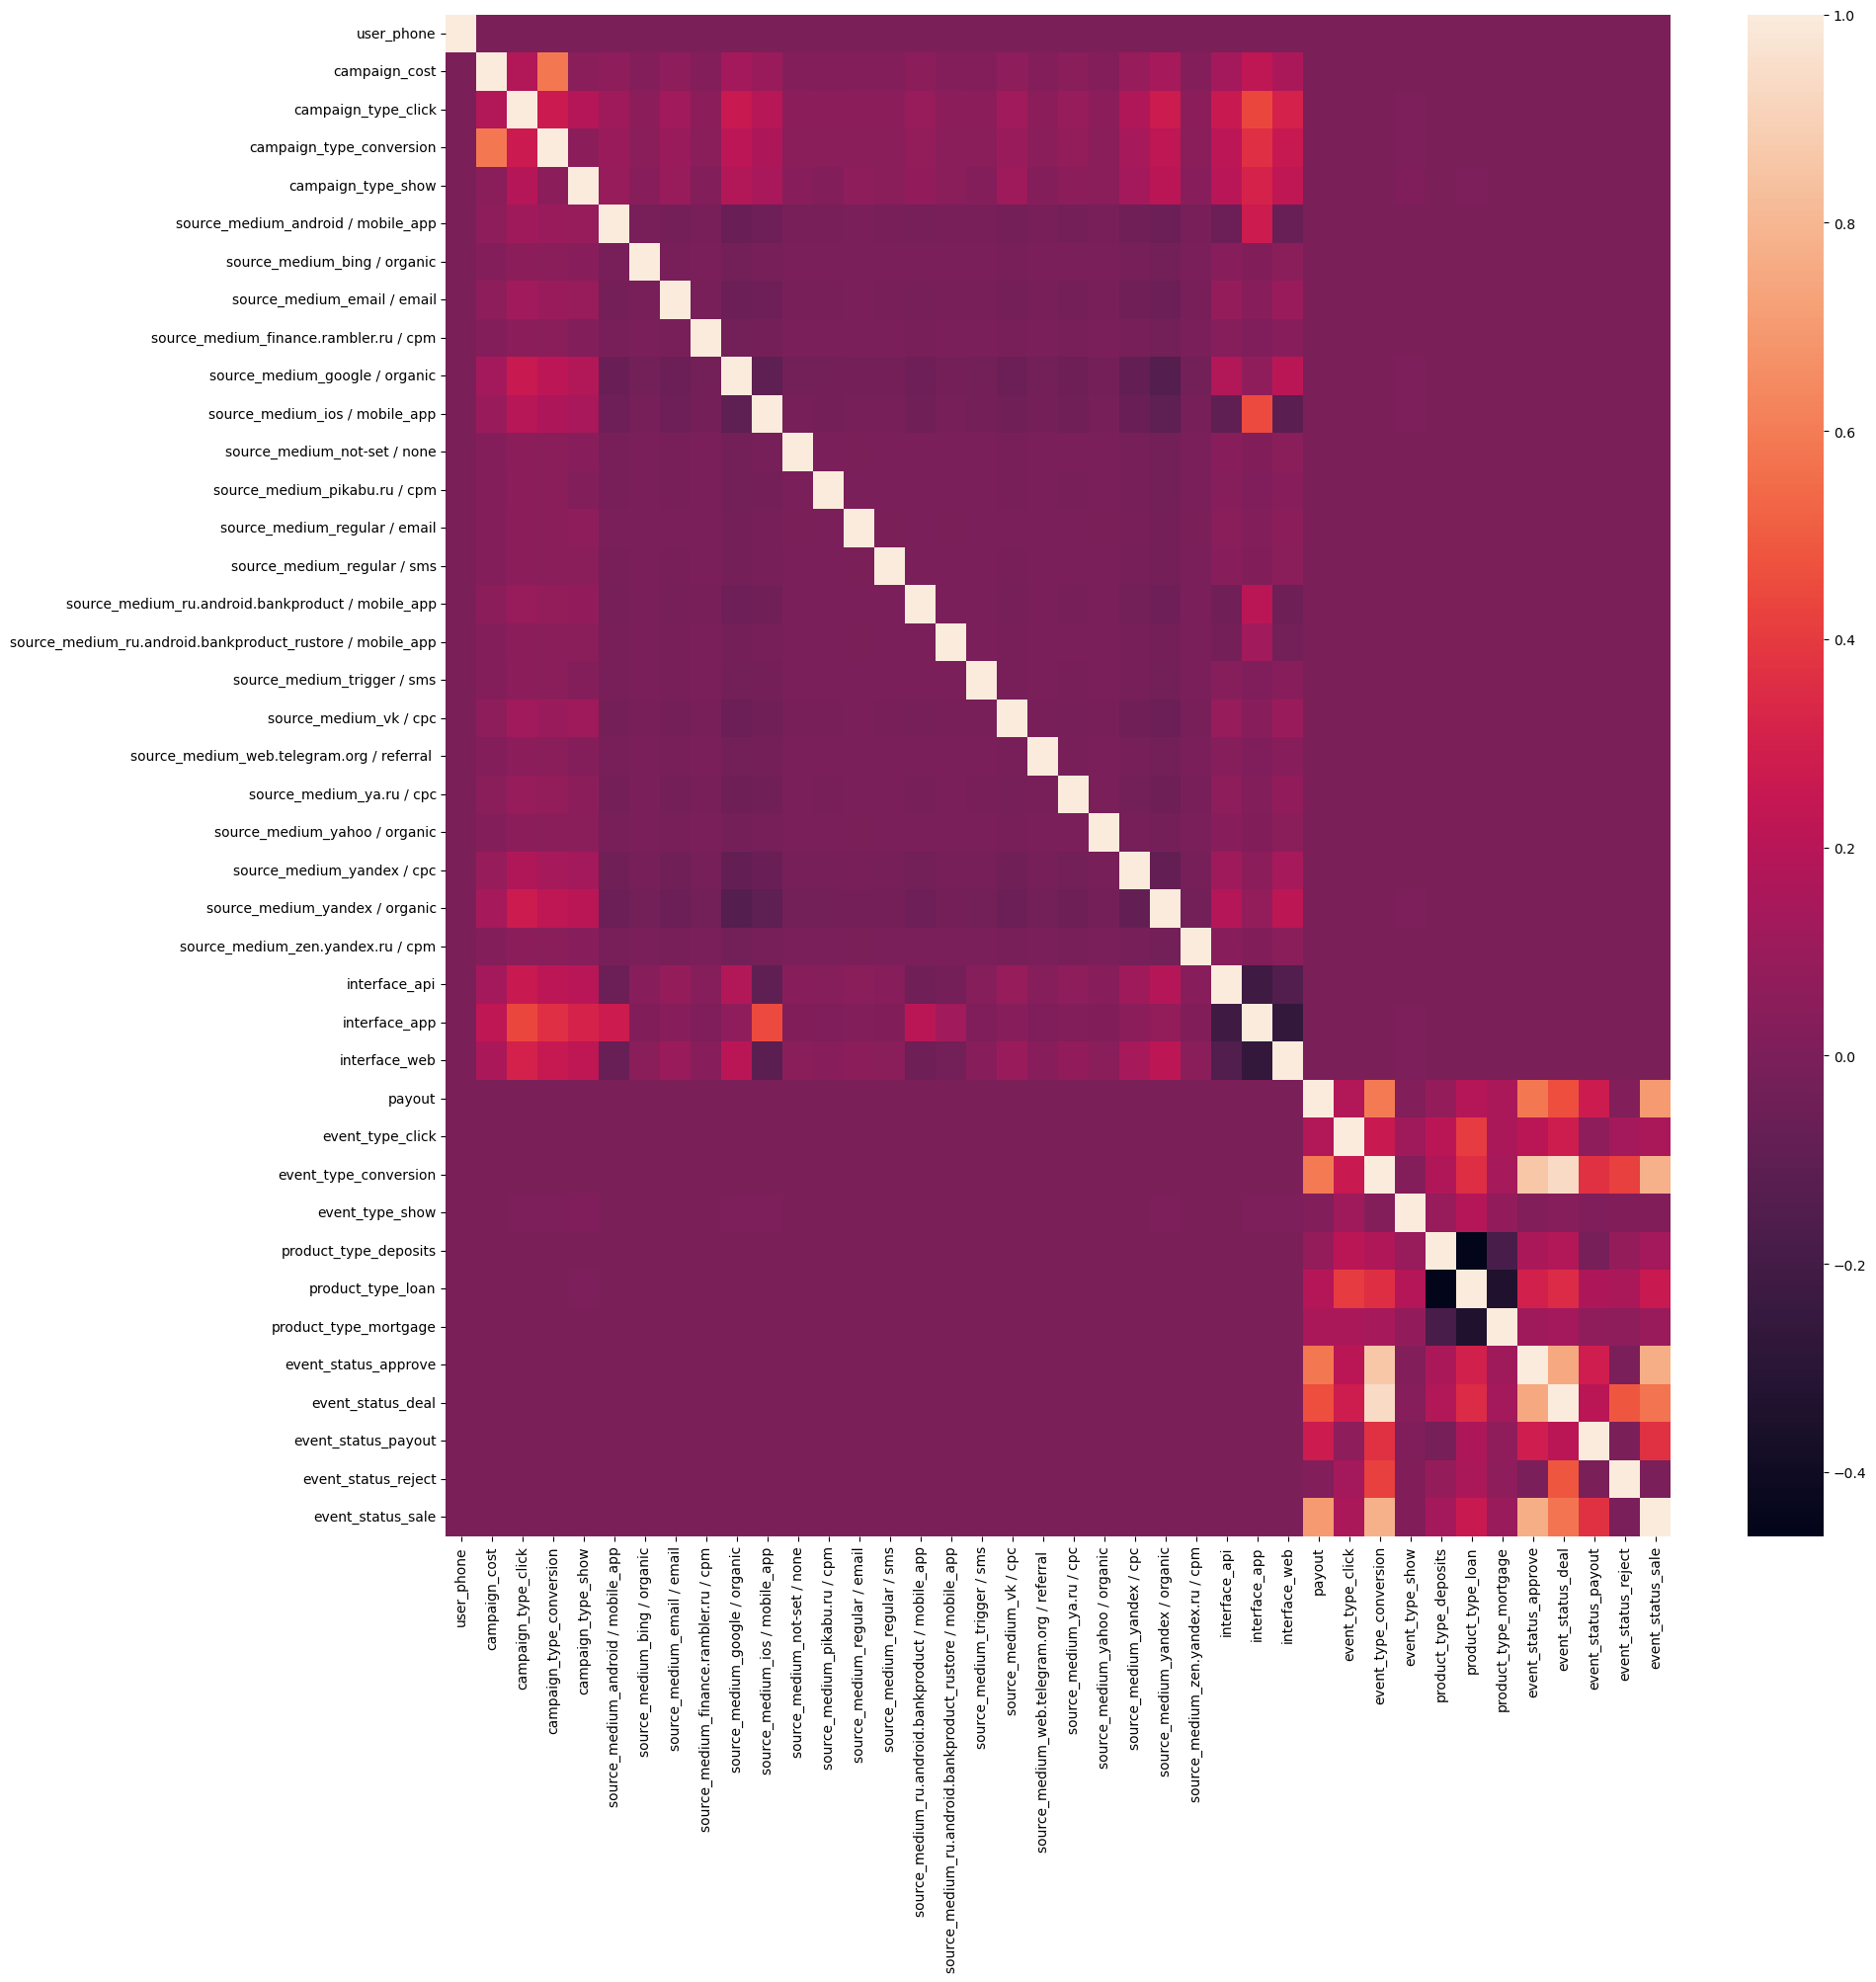

In [18]:
plt.figure(figsize=(20,20))

sns.heatmap(corr_matrix, 
            xticklabels=corr_matrix_val, 
            yticklabels=corr_matrix_val,
            )